## Name:Glory Ogor 
## Student number:501071794

## Import modules

In [1]:
!pip install ruamel.yaml

In [2]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install markupsafe==2.1.1

In [4]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [5]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install plotly
!pip install cufflinks
!pip install textblob

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [9]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [11]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


## Exploring the dataset

In [13]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [11]:
df.shape

(3150, 5)

In [12]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [13]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [14]:
#3. Are there any missing values in the dataset?
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

Text(0.5, 1.0, 'Number of Unique Values of each Feature ')

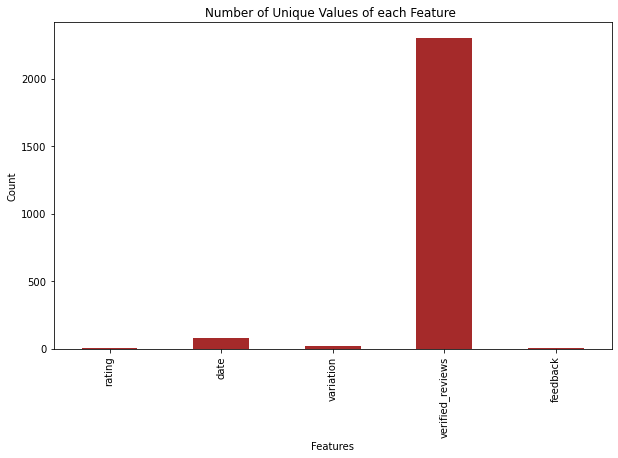

In [15]:
#Number of unique values of each column
df.nunique().plot(kind='bar', figsize=(10,6), color='brown')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Number of Unique Values of each Feature ')

<AxesSubplot:xlabel='rating', ylabel='count'>

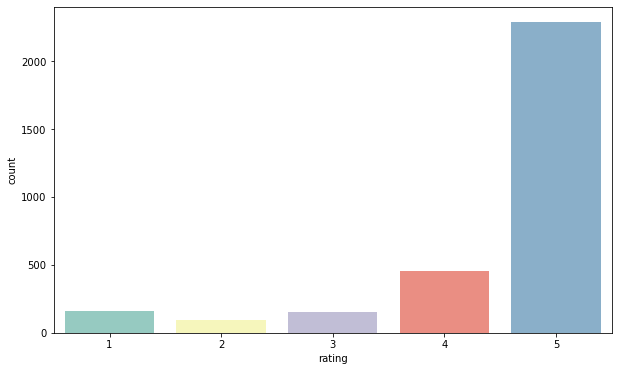

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(df['rating'],palette='Set3')

Text(0, 0.5, 'Count')

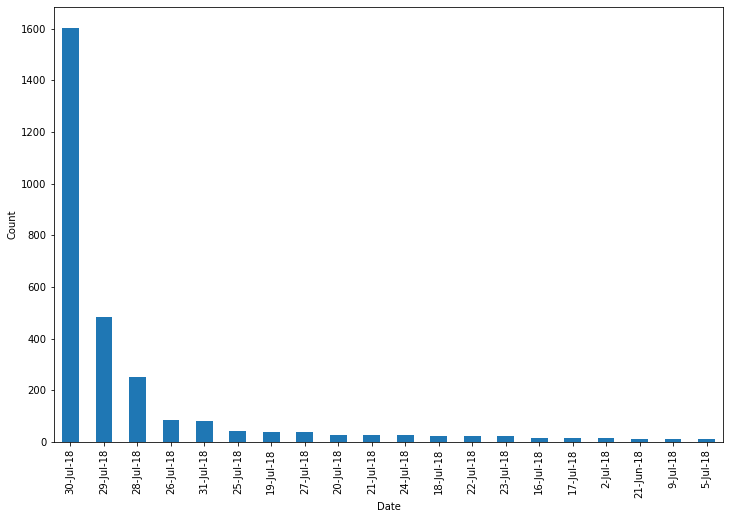

In [17]:
df['date'].value_counts()[:20].plot(kind='bar',figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Count')

#there are a lot of customer reviews written on july 30

[Text(0, 0, 'Charcoal Fabric '),
 Text(1, 0, 'Walnut Finish '),
 Text(2, 0, 'Heather Gray Fabric '),
 Text(3, 0, 'Sandstone Fabric '),
 Text(4, 0, 'Oak Finish '),
 Text(5, 0, 'Black'),
 Text(6, 0, 'White'),
 Text(7, 0, 'Black  Spot'),
 Text(8, 0, 'White  Spot'),
 Text(9, 0, 'Black  Show'),
 Text(10, 0, 'White  Show'),
 Text(11, 0, 'Black  Plus'),
 Text(12, 0, 'White  Plus'),
 Text(13, 0, 'Configuration: Fire TV Stick'),
 Text(14, 0, 'Black  Dot'),
 Text(15, 0, 'White  Dot')]

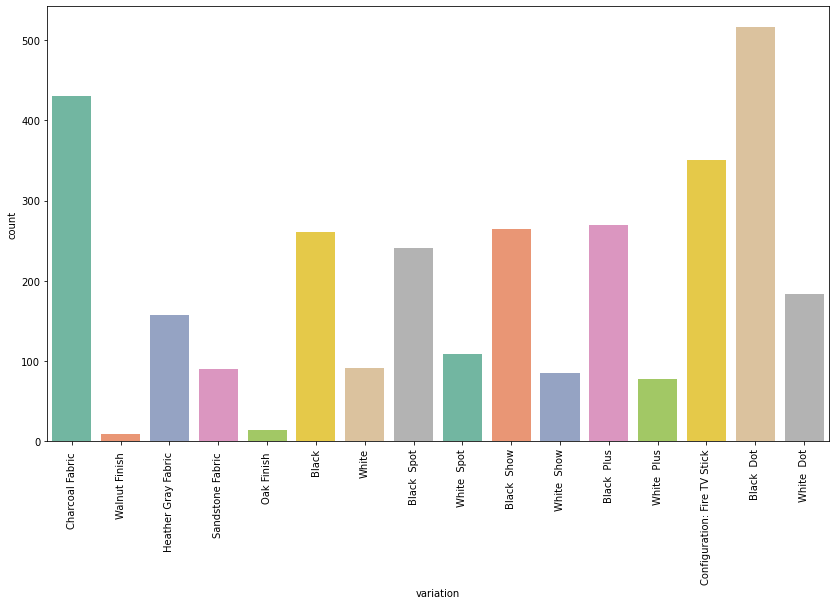

In [18]:
plt.figure(figsize=(14,8))
barplot=sns.countplot(df['variation'], palette='Set2')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='feedback', ylabel='count'>

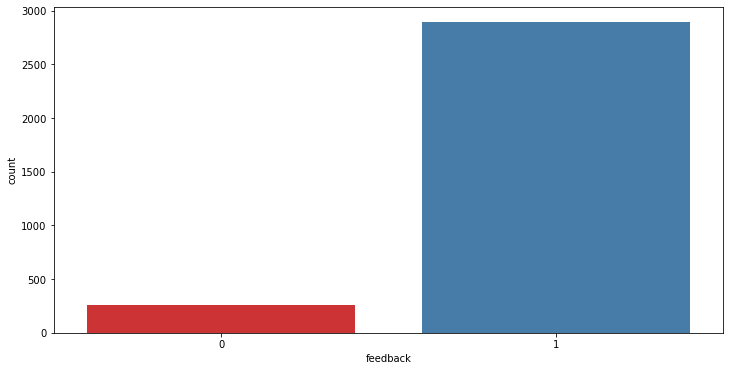

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(df['feedback'], palette='Set1')

<AxesSubplot:xlabel='rating', ylabel='count'>

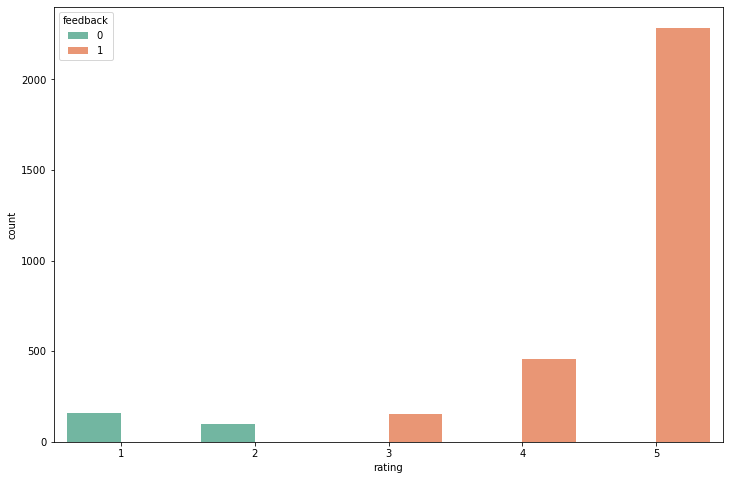

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(df['rating'], hue=df['feedback'], palette='Set2')

[Text(0, 0, 'Charcoal Fabric '),
 Text(1, 0, 'Walnut Finish '),
 Text(2, 0, 'Heather Gray Fabric '),
 Text(3, 0, 'Sandstone Fabric '),
 Text(4, 0, 'Oak Finish '),
 Text(5, 0, 'Black'),
 Text(6, 0, 'White'),
 Text(7, 0, 'Black  Spot'),
 Text(8, 0, 'White  Spot'),
 Text(9, 0, 'Black  Show'),
 Text(10, 0, 'White  Show'),
 Text(11, 0, 'Black  Plus'),
 Text(12, 0, 'White  Plus'),
 Text(13, 0, 'Configuration: Fire TV Stick'),
 Text(14, 0, 'Black  Dot'),
 Text(15, 0, 'White  Dot')]

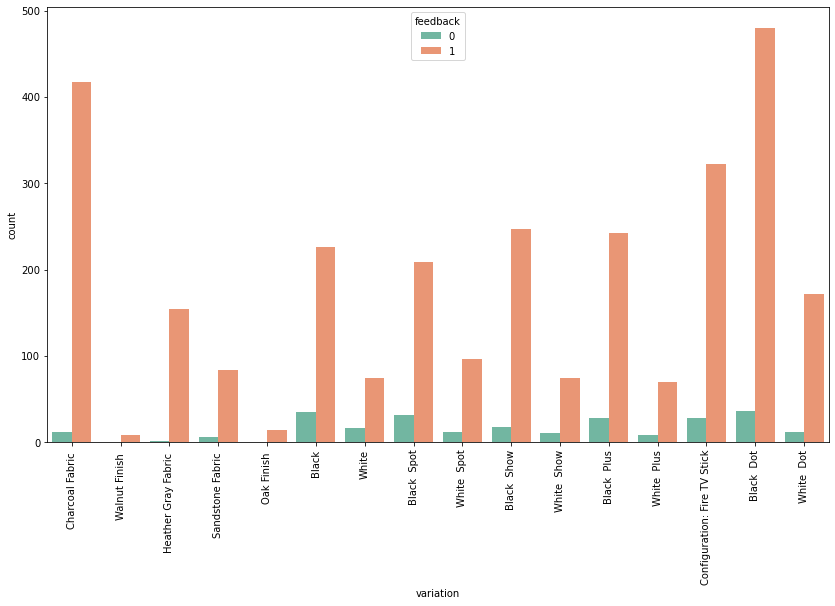

In [21]:
plt.figure(figsize=(14,8))
barplot=sns.countplot(df['variation'],hue=df['feedback'], palette='Set2')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

In [22]:
#Length of the string of verified reviews
df['length']=df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:xlabel='length'>

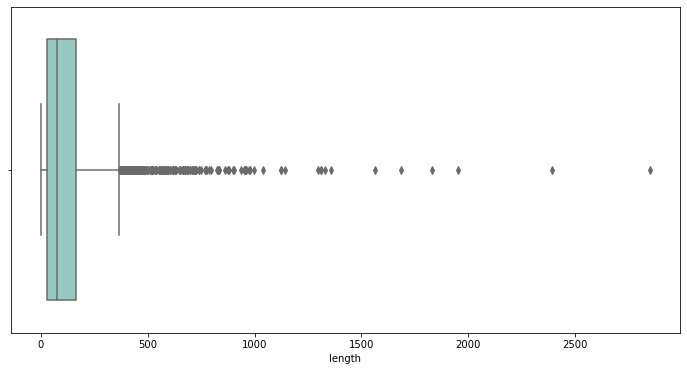

In [23]:
#box plot on length of reviews
plt.figure(figsize=(12,6))
sns.boxplot(df['length'], palette='Set3')

In [24]:
maximum_length=max(df['length'])
print('Maximum length Review from overall verified reviews is: ',maximum_length)

Maximum length Review from overall verified reviews is:  2851


In [25]:
df[df['length']==2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [26]:
df['lenght'] = df['verified_reviews'].apply(len)
df.groupby('lenght').describe().sample(10)

rating                                                feedback  \
        count      mean       std  min   25%  50%   75%  max    count   
lenght                                                                  
318       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0   
689       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
216       9.0  4.555556  0.881917  3.0  5.00  5.0  5.00  5.0      9.0   
254       3.0  4.666667  0.577350  4.0  4.50  5.0  5.00  5.0      3.0   
144       2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0      2.0   
110       4.0  4.500000  0.577350  4.0  4.00  4.5  5.00  5.0      4.0   
383       3.0  4.333333  1.154701  3.0  4.00  5.0  5.00  5.0      3.0   
23       31.0  4.677419  0.908739  1.0  5.00  5.0  5.00  5.0     31.0   
668       1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0      1.0   
184       5.0  4.800000  0.447214  4.0  5.00  5.0  5.00  5.0      5.0   

                  ...           length                                   \
            mean  ...  75%  max  count   mean  std    min    25%    50%   
lenght            ...                                                     
318     1.000000  ...  1.0  1.0    2.0  318.0  0.0  318.0  318.0  318.0   
689     1.000000  ...  1.0  1.0    1.0  689.0  NaN  689.0  689.0  689.0   
216     1.000000  ...  1.0  1.0    9.0  216.0  0.0  216.0  216.0  216.0   
254     1.000000  ...  1.0  1.0    3.0  254.0  0.0  254.0  254.0  254.0   
144     1.000000  ...  1.0  1.0    2.0  144.0  0.0  144.0  144.0  144.0   
110     1.000000  ...  1.0  1.0    4.0  110.0  0.0  110.0  110.0  110.0   
383     1.000000  ...  1.0  1.0    3.0  383.0  0.0  383.0  383.0  383.0   
23      0.935484  ...  1.0  1.0   31.0   23.0  0.0   23.0   23.0   23.0   
668     1.000000  ...  1.0  1.0    1.0  668.0  NaN  668.0  668.0  668.0   
184     1.000000  ...  1.0  1.0    5.0  184.0  0.0  184.0  184.0  184.0   

                      
          75%    max  
lenght                
318     318.0  318.0  
689     689.0  689.0  
216     216.0  216.0  
254     254.0  254.0  
144     144.0  144.0  
110     110.0  110.0  
383     383.0  383.0  
23       23.0   23.0  
668     668.0  668.0  
184     184.0  184.0  

[10 rows x 24 columns]

In [27]:
df[df['length']==2851]['feedback'].iloc[0]

1

In [28]:
positive_feedbacks=df[df['feedback']==1]['verified_reviews']
negative_feedbacks=df[df['feedback']==0]['verified_reviews']

Text(0.5, 1.0, 'Positive Feedback Reviews')

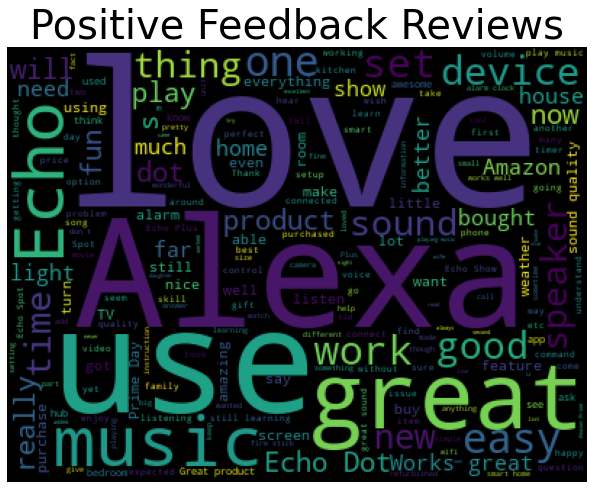

In [29]:
from wordcloud import WordCloud
plt.figure(figsize=(14,8))
wordcloud1=WordCloud(width=400,height=300, contour_color='black').generate(' '.join(positive_feedbacks))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Positive Feedback Reviews',fontsize=40)

Text(0.5, 1.0, 'Negative Feedback Reviews')

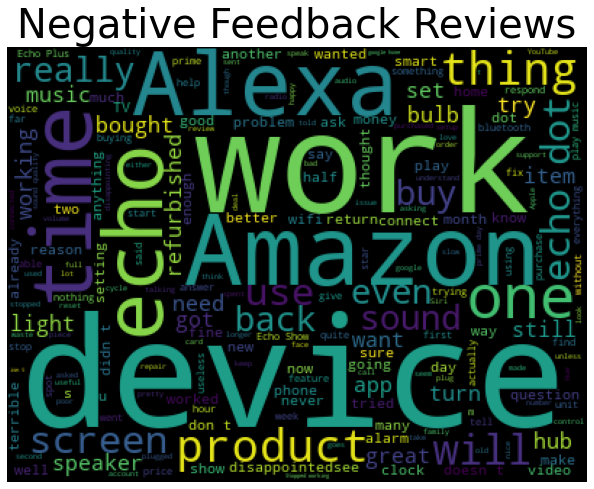

In [30]:
#Word Cloud for Negative feedback reviews
plt.figure(figsize=(14,8))
wordcloud2=WordCloud(width=400,height=300, contour_color='black').generate(' '.join(negative_feedbacks))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Negative Feedback Reviews',fontsize=40)

## Preprocessing the dataset

In [31]:
df = df[['verified_reviews', 'rating']]
df.head()

,verified_reviews,rating
0,Love my Echo!,5
1,Loved it!,5
2,"Sometimes while playing a game, you can answer...",4
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5


In [32]:
#Removing leading and ending spaces of string
df['verified_reviews']=df['verified_reviews'].apply(lambda x: x.strip())

In [33]:
#Removing URL's
df['clean_text'] = df['verified_reviews'].str.replace('http\S+|www.\S+','',case=False)
df['clean_text'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: clean_text, dtype: object

In [34]:
#Removing Numbers
df['clean_text']=df['clean_text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df['clean_text'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My  y...
4                                                Music
Name: clean_text, dtype: object

In [35]:
# convert to lowercase
df['clean_text'] = df['clean_text'].str.lower()
df.head()

,verified_reviews,rating,clean_text
0,Love my Echo!,5,love my echo!
1,Loved it!,5,loved it!
2,"Sometimes while playing a game, you can answer...",4,"sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,5,i have had a lot of fun with this thing. my y...
4,Music,5,music


In [36]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [37]:
 #Removal of Punctuations
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuations(x))
df.head()

,verified_reviews,rating,clean_text
0,Love my Echo!,5,love my echo
1,Loved it!,5,loved it
2,"Sometimes while playing a game, you can answer...",4,sometimes while playing a game you can answer ...
3,I have had a lot of fun with this thing. My 4 ...,5,i have had a lot of fun with this thing my yr...
4,Music,5,music


In [38]:
# Removal of Stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))
df.head()

,verified_reviews,rating,clean_text
0,Love my Echo!,5,love echo
1,Loved it!,5,loved
2,"Sometimes while playing a game, you can answer...",4,sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,5,lot fun thing yr old learns dinosaurs control ...
4,Music,5,music


In [39]:
# Removal of Special characters
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

df['clean_text'] = df['clean_text'].apply(lambda x: remove_spl_chars(x))
df.head()

,verified_reviews,rating,clean_text
0,Love my Echo!,5,love echo
1,Loved it!,5,loved
2,"Sometimes while playing a game, you can answer...",4,sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,5,lot fun thing yr old learns dinosaurs control ...
4,Music,5,music


In [40]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
df['clean_text']=df['clean_text'].apply(lambda x: ''.join(lem.lemmatize(term) for term in x))
df['clean_text'].head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing yr old learns dinosaurs control ...
4                                                music
Name: clean_text, dtype: object

In [41]:
#List of Tokens-Tokenization
from nltk.tokenize import word_tokenize
all_words=[]
for msg in df['verified_reviews']:
    words=word_tokenize(msg)
    for w in words:
        all_words.append(w)

In [42]:
#Frequency of Most Common Words
import nltk
frequency_dist=nltk.FreqDist(all_words)
print('Length of the words',len(frequency_dist))
print('Most Common Words',frequency_dist.most_common(100))

Length of the words 5239
Most Common Words [('.', 5088), ('I', 3176), ('the', 2891), ('to', 2796), ('it', 2415), ('and', 2179), (',', 2127), ('a', 1464), ('!', 1376), ('my', 1280), ('is', 1219), ('for', 1032), ('with', 776), ('of', 763), ('have', 748), ('that', 662), ('this', 646), ('in', 641), ('but', 584), ('Alexa', 581), ('on', 576), ('love', 556), ('Echo', 515), ('’', 506), ('music', 505), ('great', 502), ('can', 499), ('not', 487), ('you', 480), ('as', 478), ('It', 472), ('like', 468), ('up', 459), ('use', 456), ('so', 448), ('was', 445), ("n't", 407), ('Love', 363), ('The', 362), ('do', 357), ('be', 332), ('one', 332), ('all', 315), ('echo', 309), ('more', 309), ('sound', 306), ("'s", 303), ('set', 287), ('me', 281), ('just', 277), ('are', 270), ('an', 265), ('or', 254), ('when', 253), ('&', 248), ('we', 245), ('product', 242), (';', 240), ('has', 235), ('very', 234), ('get', 234), ('easy', 230), ('t', 227), ('good', 226), ('would', 220), ('#', 220), ('34', 219), ('speaker', 218)

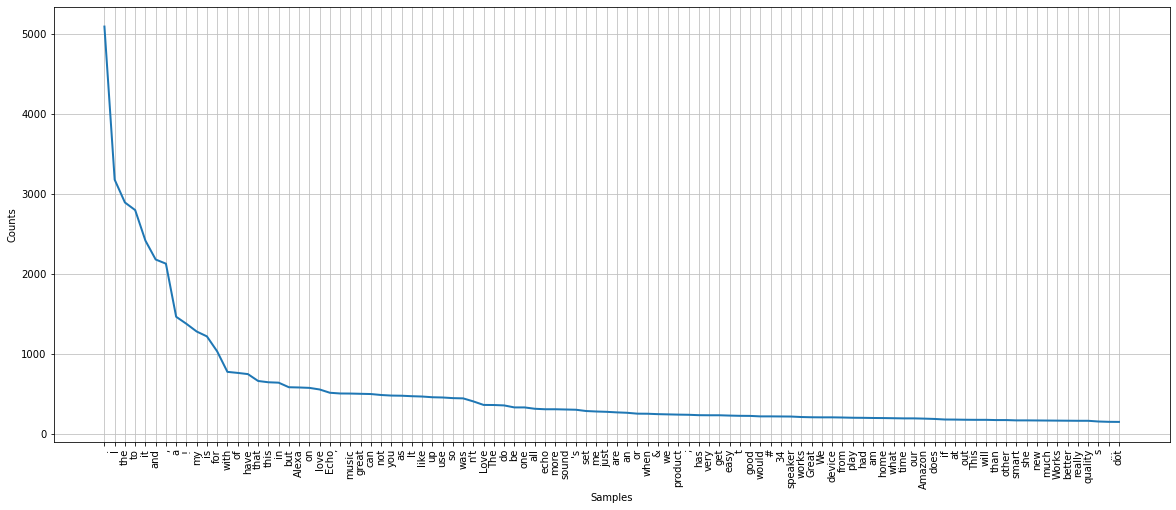

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
#Frequency Plot for first 100 most frequently occuring words
plt.figure(figsize=(20,8))
frequency_dist.plot(100,cumulative=False)

## Feature Extraction

In [57]:
#### Feature extraction using Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', 
max_features=1500, lowercase = False, ngram_range=(1,3), min_df = 1)
X  = vectorizer.fit_transform(list(df['clean_text']))
feature_names = vectorizer.get_feature_names()
print(feature_names)

['ability', 'able', 'able listen', 'able play', 'able see', 'able set', 'able tell', 'able use', 'able watch', 'absolutely', 'absolutely love', 'accent', 'access', 'account', 'across', 'across room', 'activated', 'actually', 'adapter', 'add', 'add alexa', 'added', 'adding', 'adding smart', 'addition', 'addition alexa', 'additional', 'adjust', 'advertised', 'ago', 'ai', 'alarm', 'alarm clock', 'alarms', 'alexa', 'alexa app', 'alexa device', 'alexa devices', 'alexa dont', 'alexa dot', 'alexa echo', 'alexa enabled', 'alexa great', 'alexa play', 'alexa turn', 'alexa turn lights', 'alexa voice', 'alexia', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'also bought', 'also echo', 'also like', 'also use', 'although', 'always', 'amazed', 'amazing', 'amazing product', 'amazon', 'amazon alexa', 'amazon echo', 'amazon fire', 'amazon fire stick', 'amazon music', 'amazon prime', 'amazon prime day', 'amazon would', 'annoying', 'another', 'another one', 'another room', 'answer', 'answering',

In [47]:
#Shape of tfidf vectorizer
X.shape

(3150, 1500)

## Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, df['rating'], random_state=42, test_size=0.2, stratify=df['rating'])

## Balance Classes

In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(x_train, y_train)
Counter(y_over)

Counter({4: 1829, 5: 1829, 1: 1829, 2: 1829, 3: 1829})

## Model Training

In [50]:
# Decision Tree, Naïve bayes, Multinomial Regression and Random Forest

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [52]:
# training
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)

# testing
pred = model.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.33      0.03      0.06        32
           2       0.00      0.00      0.00        19
           3       0.67      0.06      0.12        31
           4       0.50      0.14      0.22        91
           5       0.75      0.99      0.85       457

    accuracy                           0.74       630
   macro avg       0.45      0.25      0.25       630
weighted avg       0.67      0.74      0.66       630



In [53]:
# training
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing
pred = model.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.53      0.53      0.53        32
           2       0.56      0.47      0.51        19
           3       0.43      0.48      0.45        31
           4       0.52      0.35      0.42        91
           5       0.86      0.91      0.88       457

    accuracy                           0.78       630
   macro avg       0.58      0.55      0.56       630
weighted avg       0.76      0.78      0.77       630



In [54]:
# training naive bayes
model = MultinomialNB()
model.fit(x_train, y_train)

# testing
pred = model.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.03      0.06        32
           2       0.00      0.00      0.00        19
           3       1.00      0.03      0.06        31
           4       0.50      0.07      0.12        91
           5       0.74      1.00      0.85       457

    accuracy                           0.74       630
   macro avg       0.65      0.23      0.22       630
weighted avg       0.71      0.74      0.64       630



In [55]:
# training
model = RandomForestClassifier()
model.fit(x_train, y_train)

# testing
pred = model.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.75      0.38      0.50        32
           2       1.00      0.47      0.64        19
           3       0.82      0.45      0.58        31
           4       0.74      0.35      0.48        91
           5       0.83      0.98      0.90       457

    accuracy                           0.82       630
   macro avg       0.83      0.53      0.62       630
weighted avg       0.82      0.82      0.79       630



## Conclusion

After performing preprocessing with the input data removing all the unnecessary values, features are extracted using bag of words with good parameters. Of all the model that are trained, RandomForest perform the best with 82% accuracy compared to all the other models